In [1]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END

## Reducers 
from typing import Annotated
from langgraph.graph.message import add_messages


In [2]:
class State(TypedDict):
    messages:Annotated[list,add_messages]

In [3]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"] = os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"] = os.getenv("GROQ_API_KEY")


In [7]:
from langchain_openai import ChatOpenAI
from langchain_groq import ChatGroq
llm=ChatOpenAI(model="gpt-4o",temperature=1)
llm_groq=ChatGroq(model="llama3-8b-8192",temperature=1)
llm.invoke("What is the capital of France? and what do you know about it")

AIMessage(content='The capital of France is Paris. Known as "The City of Light," Paris is renowned for its history, culture, art, and architecture. It is home to some of the world\'s most famous landmarks, such as the Eiffel Tower, the Notre-Dame Cathedral, and the Louvre Museum, which houses thousands of works of art, including the Mona Lisa.\n\nParis is a major center for fashion, gastronomy, and commerce. The city\'s influence on art and culture is substantial, having been a hub for artists, intellectuals, and writers throughout history. Some of the great artists, such as Pablo Picasso and Claude Monet, worked and lived in Paris.\n\nThe city is also famous for its charming cafes and vibrant street life. With avenues like the Champs-Élysées and districts like Montmartre, Paris offers a rich urban experience. The River Seine runs through the city, providing scenic views and river cruises.\n\nAdditionally, Paris plays an important role politically, being the center of French government

In [8]:
### We will start with creating our nodes 
def superbot(state:State):
    return {"messages":[llm_groq.invoke(state['messages'])]}


### Now we will create our graph 

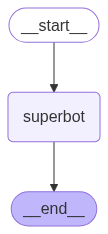

In [ ]:
from IPython.display import Image,display
from langgraph.graph import StateGraph,START,END
from typing_extensions import TypedDict

graph=StateGraph(State)
graph.add_node("superbot",superbot)
graph.add_edge(START,"superbot")
graph.add_edge("superbot",END)

compiled_graph=graph.compile()
display(Image(compiled_graph.get_graph().draw_mermaid_png()))


#compiled_graph.invoke({"messages":["Hello, how can I help you today?"]})




In [12]:
##Invocation 

compiled_graph.invoke({"messages":["Hello, how can I help you today?"]})

{'messages': [HumanMessage(content='Hello, how can I help you today?', additional_kwargs={}, response_metadata={}, id='bfea7d1b-89e9-46eb-b262-7436b24083e0'),
  AIMessage(content="Thank you for asking! I'm an AI, so I don't have any specific tasks or requests, but I'm here to chat with you and help with any questions or topics you'd like to discuss.\n\nIf you're feeling stuck or need help with something, I can assist with:\n\n* Answering questions on a wide range of topics\n* Providing information on various subjects\n* Giving suggestions or recommendations\n* Engaging in fun conversations or debates\n* Even helping with language-related tasks, such as writing or proofreading\n\nSo, feel free to ask me anything that's on your mind, and I'll do my best to help or chat with you!", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 134, 'prompt_tokens': 19, 'total_tokens': 153, 'completion_time': 0.095330681, 'prompt_time': 0.002754266, 'queue_time': 0.068801427

###Streaming teh responses 

In [15]:
for event in compiled_graph.stream({"messages":"Hey, how are you?"},stream_mode="values"):
    print(event)

{'messages': [HumanMessage(content='Hey, how are you?', additional_kwargs={}, response_metadata={}, id='797d13d7-f0ae-40dc-b828-38d4f4976818')]}
{'messages': [HumanMessage(content='Hey, how are you?', additional_kwargs={}, response_metadata={}, id='797d13d7-f0ae-40dc-b828-38d4f4976818'), AIMessage(content="I'm just a language model, I don't have feelings like humans do, but I'm functioning properly and ready to assist you with any questions or tasks you may have! How about you? How's your day going so far?", additional_kwargs={}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 16, 'total_tokens': 64, 'completion_time': 0.072656625, 'prompt_time': 0.004144809, 'queue_time': 0.06419736, 'total_time': 0.076801434}, 'model_name': 'llama3-8b-8192', 'system_fingerprint': 'fp_8dc6ecaf8e', 'finish_reason': 'stop', 'logprobs': None}, id='run-4d5c540b-bf8a-44a2-914a-564fbdfb997b-0', usage_metadata={'input_tokens': 16, 'output_tokens': 48, 'total_tokens': 64})]}
